In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory('input/CODE19 Data/Training Data',target_size=(299,299),
                                                 color_mode='rgb')

Found 746 images belonging to 2 classes.


In [3]:
for image_batch, label_batch in image_data:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break
IMAGE_SHAPE = (299,299)

Image batch shape:  (32, 299, 299, 3)
Label batch shape:  (32, 2)


In [36]:
feature_extractor_url='https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'

In [39]:
labels = ['Covid','Non Covid']
transfer_model = tf.keras.Sequential(
    [hub.KerasLayer(feature_extractor_url,output_shape=[2048],trainable=False),
     tf.keras.layers.Dense(image_data.num_classes, activation='softmax')]
)
transfer_model.build([None, 299, 299, 3])
transfer_model.summary()

OSError: SavedModel file does not exist at: /var/folders/vn/x6j9n_kd3fq5cbvfcggf6n1c0000gn/T/tfhub_modules/e9d69501e0667594e2c6ab8ab5a96bb3fe5f8cef/{saved_model.pbtxt|saved_model.pb}

In [37]:
early_stop=keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [7]:
manual_model=keras.Sequential([
    keras.layers.Convolution2D(64,(3,3),input_shape=(299,299,3),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Convolution2D(32,(2,2),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Convolution2D(16,(2,2),activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dense(32,activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2,activation=tf.nn.softmax)
])
manual_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 99, 99, 128)       8320      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 49, 49, 64)       

In [8]:
prediction = transfer_model(image_batch)
prediction.shape

TensorShape([32, 2])

In [9]:
transfer_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
steps = np.floor(image_data.samples/image_data.batch_size)

In [11]:
transfer_history = transfer_model.fit(image_data, epochs=100, steps_per_epoch= steps, callbacks=[early_stop])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23.0 steps
Epoch 1/100
23/23 [==============================] - 104s 5s/step - loss: 0.7009 - accuracy: 0.5994
Epoch 2/100
23/23 [==============================] - 105s 5s/step - loss: 0.6549 - accuracy: 0.7409
Epoch 3/100
23/23 [==============================] - 116s 5s/step - loss: 0.6414 - accuracy: 0.7577
Epoch 4/100
23/23 [==============================] - 127s 6s/step - loss: 0.6250 - accuracy: 0.7899
Epoch 5/100
23/23 [==============================] - 128s 6s/step - loss: 0.6165 - accuracy: 0.8151
Epoch 6/100
23/23 [==============================] - 126s 5s/step - loss: 0.6145 - accuracy: 0.8179
Epoch 7/100
23/23 [==============================] - 126s 5s/step - loss: 0.6081 - accuracy: 0.8417
Epoch 8/100
23/23 [==============================] - 137s 6s/step - loss: 0.5991 - accuracy: 0.8515
Epoch 9/100
23/23 [==============================] - 144s 6s/step - loss: 0.5964 - accuracy: 0.8585
Epoch 10/100
23/23 [==============================] - 149s 6s/step - loss: 0.59

## Epochs: 100
### loss: 0.5265 accuracy: 0.9720

In [12]:
manual_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [33]:
manual_history = manual_model.fit(image_data, epochs=10, steps_per_epoch= steps)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 23.0 steps
Epoch 1/10
23/23 [==============================] - 115s 5s/step - loss: 0.5263 - accuracy: 0.9524
Epoch 2/10
23/23 [==============================] - 96s 4s/step - loss: 0.5172 - accuracy: 0.9720
Epoch 3/10
23/23 [==============================] - 110s 5s/step - loss: 0.5162 - accuracy: 0.9734
Epoch 4/10
23/23 [==============================] - 101s 4s/step - loss: 0.5165 - accuracy: 0.9720
Epoch 5/10
23/23 [==============================] - 168s 7s/step - loss: 0.5158 - accuracy: 0.9776
Epoch 6/10
23/23 [==============================] - 156s 7s/step - loss: 0.5291 - accuracy: 0.9468
Epoch 7/10
23/23 [==============================] - 147s 6s/step - loss: 0.5245 - accuracy: 0.9538
Epoch 8/10
23/23 [==============================] - 126s 5s/step - loss: 0.5195 - accuracy: 0.9664
Epoch 9/10
23/23 [==============================] - 106s 5s/step - loss: 0.5210 - accuracy: 0.9650
Epoch 10/10
23/23 [==============================] - 96s 4s/step - loss: 0.5168 - accurac

## Epochs: 60
### loss: 0.5168 accuracy=0.9734

In [35]:
transfer_model.save('Models/Lung_Transfer_Model')
manual_model.save('Models/Lung_Manual_Model')

INFO:tensorflow:Assets written to: Models/Lung_Transfer_Model/assets


INFO:tensorflow:Assets written to: Models/Lung_Transfer_Model/assets


INFO:tensorflow:Assets written to: Models/Lung_Manual_Model/assets


INFO:tensorflow:Assets written to: Models/Lung_Manual_Model/assets


In [20]:
test_data=image_generator.flow_from_directory('input/CODE19 Data/Testing Data',target_size=IMAGE_SHAPE)

Found 121 images belonging to 2 classes.


In [117]:
ypred  = model.predict(test_data)
pred_id = np.argmax(ypred,axis = -1)

In [118]:
actual_id = np.argmax(label_batch, axis=-1)

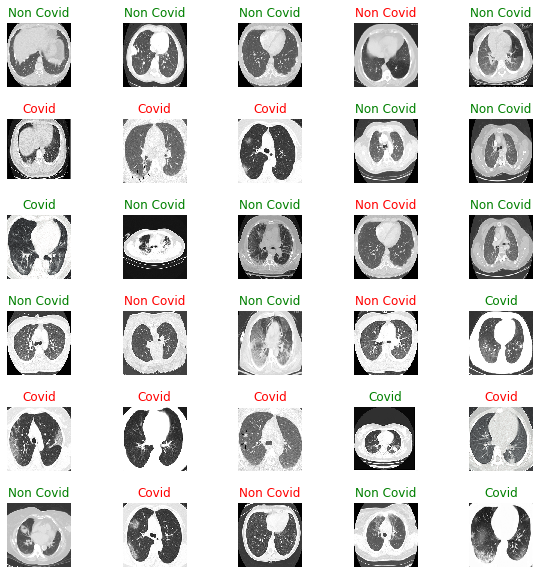

In [119]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(test_data[0][0][i])
    color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title(labels[pred_id[i]],color=color)
    plt.axis('off')
plt.show()

In [50]:
classifier=tf.keras.models.load_model('Models/Covid_model')

ValueError: An empty Model cannot be used as a Layer.

In [28]:
test_image=image_generator.flow_from_directory('lung_test',target_size=(299,299))

Found 16 images belonging to 1 classes.


In [29]:
test_pred=model_new.predict(test_image)

In [30]:
final_pred=np.argmax(test_pred,axis = -1)

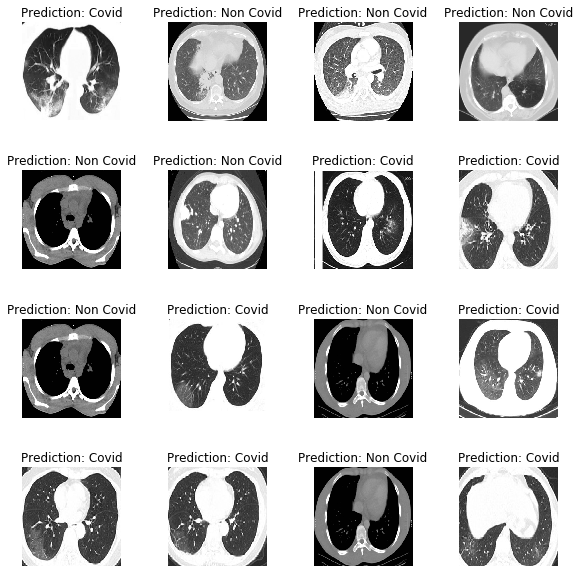

In [31]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
files=os.listdir('lung_test/new_images/')
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(test_image[0][0][i])
#     color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title("Prediction: {}".format(labels[final_pred[i]]))
    plt.axis('off')
plt.show()

In [32]:
test_pred_manual=model_new_manual.predict(test_image)

In [33]:
final_pred_manual=np.argmax(test_pred_manual,axis = -1)

First Model Prediction : Second Model Prediction


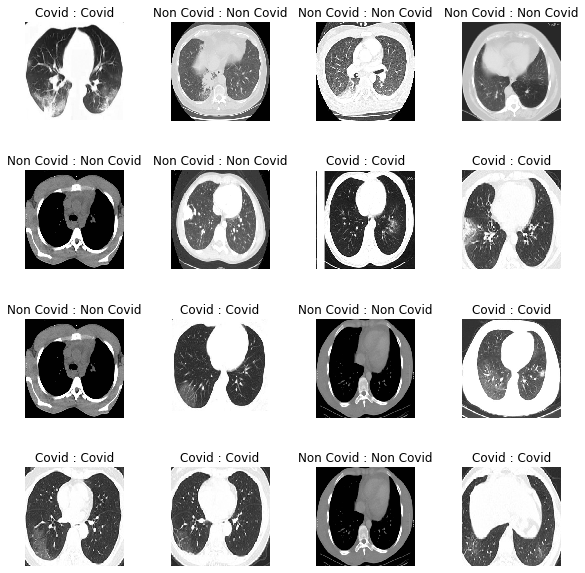

In [35]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5)
files=os.listdir('lung_test/new_images/')
print("First Model Prediction : Second Model Prediction")
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(test_image[0][0][i])
#     color='green' if pred_id[i]==actual_id[i] else 'red'
    plt.title("{} : {}".format(labels[final_pred_manual[i]],labels[final_pred[i]]))
#     plt.title("{}".format(labels[final_pred_manual[i]]))
    plt.axis('off')
plt.show()

In [25]:
model_new=tf.keras.models.load_model('Models/Lung_Transfer_Model')
model_new.build([None, 299, 299, 3])

In [26]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  21802784  
_________________________________________________________________
dense (Dense)                multiple                  4098      
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


In [14]:
model_new_manual=tf.keras.models.load_model('Models/Lung_Manual_Model')